In [2]:
!pip install -U gensim 

You should consider upgrading via the 'C:\Users\vamsee\anaconda3\python.exe -m pip install --upgrade pip' command.


# Word2vec model 

In [1]:
import gensim

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("main_customer_reviews.csv",encoding= "cp1252")

In [4]:
data.head()

,customerID,experience_with_device,user_interface,overall_experience,label
0,1001,good experience and I liked it.,8,8,positive
1,1002,enjoyed it a lot. No isses with the device,9,8,positive
2,1003,easy to monitor the results,9,10,positive
3,1004,not satisfied,3,5,negative
4,1004,hard to control,3,6,negative


In [5]:
### gensim provides the inbuilt feature that performs all text cleaning operation in one line
data['clean_text']= data["experience_with_device"].apply(lambda x: gensim.utils.simple_preprocess(x))

In [6]:
data.head(2)

,customerID,experience_with_device,user_interface,overall_experience,label,clean_text
0,1001,good experience and I liked it.,8,8,positive,"[good, experience, and, liked, it]"
1,1002,enjoyed it a lot. No isses with the device,9,8,positive,"[enjoyed, it, lot, no, isses, with, the, device]"


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(data["clean_text"], data["label"], test_size=0.2)

In [9]:
w2v_model = gensim.models.Word2Vec(X_train, vector_size=100, min_count =2, window=5)

In [10]:
w2v_model.wv.most_similar("device")

[('innovation', 0.3133196532726288),
 ('liked', 0.2868468463420868),
 ('application', 0.24284043908119202),
 ('healthy', 0.2115880399942398),
 ('don', 0.197336345911026),
 ('had', 0.19042448699474335),
 ('for', 0.17970195412635803),
 ('performance', 0.17209604382514954),
 ('product', 0.15597976744174957),
 ('recommended', 0.14772626757621765)]

In [11]:
w2v_model.wv.index_to_key

['the',
 'and',
 'is',
 'with',
 'product',
 'device',
 'to',
 'it',
 'good',
 'not',
 'this',
 'for',
 'results',
 'in',
 'battery',
 'have',
 'are',
 'very',
 'design',
 'of',
 'my',
 'can',
 'quite',
 'great',
 'be',
 'me',
 'been',
 'more',
 'but',
 'easy',
 'performance',
 'amazing',
 'no',
 'lovely',
 'every',
 'hard',
 'some',
 'bad',
 'satisfied',
 'interface',
 'fitness',
 'useful',
 'handy',
 'helped',
 'your',
 'high',
 'time',
 'body',
 'power',
 'simple',
 'price',
 'set',
 'best',
 'up',
 'family',
 'issues',
 'money',
 'monitered',
 'one',
 'okay',
 'giving',
 'don',
 'easily',
 'happy',
 'updates',
 'economically',
 'ways',
 'had',
 'liked',
 'works',
 'life',
 'just',
 'from',
 'innovation',
 'comes',
 'use',
 'love',
 'could',
 'application',
 'understand',
 'purpose',
 'suffice',
 'fit',
 'takes',
 'has',
 'lot',
 'perfect',
 'features',
 'healthy',
 'recommended',
 'control',
 'using',
 'poor',
 'pysicians',
 'connectivity',
 'you',
 'user',
 'better',
 'stay',
 're

In [12]:
w2v_vector =np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index_to_key]) for ls in X_test])

In [13]:
for index, value in enumerate(w2v_vector):
    print(len(X_test.iloc[index]), len(value))

10 5
5 3
13 6
6 2
2 1
11 6
7 4
3 3
8 8
14 9
3 3
3 0
13 8
2 0
5 4
7 4
7 6
15 7
8 4


In [15]:
### the model throws an error if it finds that the no of words in one text differs to the number of features in the other text
### from the above example, it is observed that number of features changes and they have to in equal length
### this can be done using the following code

w2v_average = []

for vector in w2v_vector:
    if len(vector)!= 0:
        w2v_average.append(vector.mean(axis=0))
    else:
        w2v_average.append(np.zeros(100))

In [18]:
for i,v in enumerate(w2v_average):
    print(len(X_test.iloc[i]), len(v))

10 100
5 100
13 100
6 100
2 100
11 100
7 100
3 100
8 100
14 100
3 100
3 100
13 100
2 100
5 100
7 100
7 100
15 100
8 100


In [19]:
### now that the model is ready and it can be used in the future

# Doc2Vec model

In [105]:
Doc_data = pd.read_csv("main_customer_reviews.csv",encoding= "cp1252")

In [78]:
### gensim provides the inbuilt feature that performs all text cleaning operation in one line
Doc_data['clean_text']= Doc_data["experience_with_device"].apply(lambda x: gensim.utils.simple_preprocess(x))

In [79]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(Doc_data["clean_text"], Doc_data["label"], test_size=0.2)

In [81]:
## create tagged documents
tagged_docs_train = [gensim.models.doc2vec.TaggedDocument(v,[i]) for i,v in enumerate(X_train1)]
tagged_docs_test =[gensim.models.doc2vec.TaggedDocument(v,[i]) for i,v in enumerate(X_test1)]

In [83]:
tagged_docs_train[0]

TaggedDocument(words=['thank', 'you', 'for', 'the', 'device', 'the', 'way', 'it', 'handles', 'and', 'monitors', 'the', 'results', 'is', 'amazing'], tags=[0])

In [84]:
## now create a doc2vec model
doc2vec_model = gensim.models.Doc2Vec(tagged_docs_train, vector_size=100, window=5, min_count=2)

In [92]:
## infer vector method is used to convert the words into numeric vector representation
## it can be applied on all the data as follows

vector_train_set = [doc2vec_model.infer_vector(v.words) for v in tagged_docs_train]
vector_test_set = [doc2vec_model.infer_vector(v.words) for v in tagged_docs_test]

In [ ]:
### now random forest model is created and fitted on the doc to vec model

In [94]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

In [97]:
model = RandomForestClassifier()
model.fit(vector_train_set, Y_train1.values.ravel())

Y_pred = model.predict(vector_test_set)

precision = precision_score(Y_test1, Y_pred, pos_label="negative")

In [98]:
recall = recall_score(Y_test1, Y_pred, pos_label="negative")

In [99]:
print("the precision obtained with the doc2vec model is {}".format(precision))
print("the recall obtained with the doc2vec model is {}".format(recall))


the precision obtained with the doc2vec model is 0.6
the recall obtained with the doc2vec model is 0.3333333333333333


# Neural Network

In [59]:
keras_data = pd.read_csv("main_customer_reviews.csv",encoding= "cp1252")

In [60]:
### gensim provides the inbuilt feature that performs all text cleaning operation in one line
keras_data['clean_text']=keras_data["experience_with_device"].apply(lambda x: gensim.utils.simple_preprocess(x))

In [61]:
labels = np.where(keras_data["label"]=="positive",1,0)

In [62]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(keras_data["clean_text"], labels, test_size=0.2)

In [63]:
! pip install -U keras

You should consider upgrading via the 'C:\Users\vamsee\anaconda3\python.exe -m pip install --upgrade pip' command.


In [64]:
from keras.preprocessing.text import Tokenizer

In [65]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train2)

In [66]:
x_train_seq = tokenizer.texts_to_sequences(X_train2)
X_test_seq = tokenizer.texts_to_sequences(X_test2)

In [67]:
## Pad sequences  - it is used to set the length of all integers or sentences to the same lenght
from keras.preprocessing.sequence import pad_sequences

In [68]:
X_train_pad_seq = pad_sequences(x_train_seq,50)
X_test_pad_seq = pad_sequences(X_test_seq, 50)

In [69]:
X_test_pad_seq[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 205,  35])

In [70]:
## model creation
import keras.backend as K
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential

In [71]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [72]:
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout = 0, recurrent_dropout =0))
model.add(Dense(32,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          7808      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 17,217
Trainable params: 17,217
Non-trainable params: 0
_________________________________________________________________


In [73]:
## compile the model

model.compile(optimizer="adam", loss= "binary_crossentropy", metrics =["accuracy", recall_m, precision_m])

In [136]:
## fit the model
fitted_model = model.fit(X_train_pad_seq, Y_train2, batch_size=32, epochs=10, validation_data=(X_test_pad_seq, Y_test2))

Epoch 1/10


InvalidArgumentError:  indices[0,38] = 119 is not in [0, 7)
	 [[node sequential_3/embedding_3/embedding_lookup (defined at C:\Users\vamsee\AppData\Roaming\Python\Python38\site-packages\keras\layers\embeddings.py:184) ]] [Op:__inference_train_function_18183]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_3/embedding_3/embedding_lookup:
 sequential_3/embedding_3/embedding_lookup/16867 (defined at C:\Users\vamsee\anaconda3\lib\contextlib.py:113)	
 sequential_3/embedding_3/Cast (defined at C:\Users\vamsee\AppData\Roaming\Python\Python38\site-packages\keras\layers\embeddings.py:183)

Function call stack:
train_function


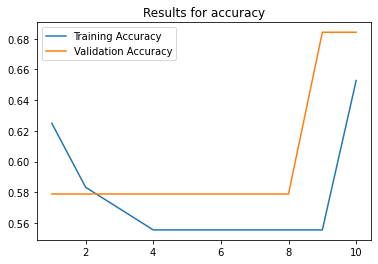

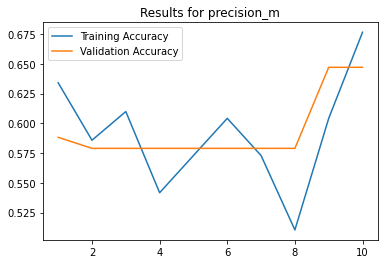

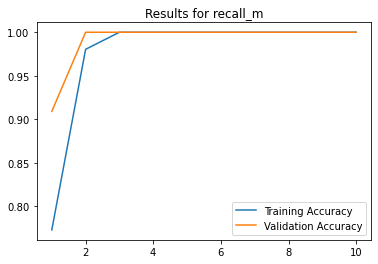

In [75]:
# Plot the evaluation metrics by each epoch for the model to see if we are over or underfitting
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = fitted_model.history[i]
    val_acc = fitted_model.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

## neural nets with custom preprocessing method

In [101]:
import nltk

In [100]:
import string
import re

In [102]:
stop_words = nltk.corpus.stopwords.words("english")

In [112]:
### neural nets with custom preprocessing method

def clean_data(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stop_words]
    return text

In [113]:
data = pd.read_csv("main_customer_reviews.csv",encoding= "cp1252")

In [114]:
data["label"]= np.where(data["label"]=="positive",1,0)

In [115]:
data["clean_text"]= data["experience_with_device"].apply(lambda x: clean_data(x))

In [116]:
data.head(2)

,customerID,experience_with_device,user_interface,overall_experience,label,clean_text
0,1001,good experience and I liked it.,8,8,1,"[good, experience, liked]"
1,1002,enjoyed it a lot. No isses with the device,9,8,1,"[enjoyed, lot, isses, device]"


In [117]:
X_train_NN, X_test_NN, Y_train_NN, Y_test_NN = train_test_split(data[["clean_text","user_interface","overall_experience"]], data["label"], test_size = 0.2)

In [118]:
X_train_NN.sample(2)

,clean_text,user_interface,overall_experience
47,"[able, connect, phone]",5,4
51,"[amazing, giving, 10, stars]",10,10


In [131]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_NN)

X_train_seq = tokenizer.texts_to_sequences(X_train_NN)
X_test_seq = tokenizer.texts_to_sequences(X_test_NN)

In [124]:
X_train_pad_seq = pad_sequences(x_train_seq,50)
X_test_pad_seq = pad_sequences(X_test_seq, 50)

In [125]:
X_train_pad_seq[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 46,  1, 94, 95,  2, 47])

In [126]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [127]:
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout = 0, recurrent_dropout =0))
model.add(Dense(32,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          224       
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 9,633
Trainable params: 9,633
Non-trainable params: 0
_________________________________________________________________
